Introduction: We are Team Thomas Greville, with members:
Yazda Cokgor (yscokgor@berkeley.edu, GIT username: yscokgor)Amanda Neslund (amandaneslund@berkeley.edu, GIT username: amandaneslund)
Angel Prasad (ap5473@berkeley.edu, GIT username: angelprasad).
opic:tAe analysis of AIDS/ HIVs in Botsw and Zimbawaeans:Goal:  

Our project focused on anthe effect of DS/  HIV on populations, the difference in IDS/ HIV prevelance on the sexes, on agriculture and exploring why this may be the case and how it differs in opposed to Zimbabwe.

Enjoy our code!1]

[Goal 2]

In [38]:
#Installation of datahubs necessary
%pip install wbdata
import wbdata

%pip install cufflinks
import cufflinks as cf
cf.go_offline()

import matplotlib.pyplot as plt
%matplotlib widget

import numpy as np

#Botswana Code is "BWA"
#Zimbabwe Code is "ZWE"

def fix_date_index(df):
    idx_vars = df.index.names
    new = df.reset_index()
    new.date = new.date.astype(int)
    return new.set_index(idx_vars)

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [53]:
#Getting Indicator for Gender Statistics 
wbdata.get_sources()

gen_stats = 14
indicators_genstat = wbdata.get_indicators (source = gen_stats)

In [54]:
#Getting Indicator for Health Nutririon and Population Statistics 
health_nut = 16
indicators_healthnut = wbdata.get_indicators (source = health_nut)

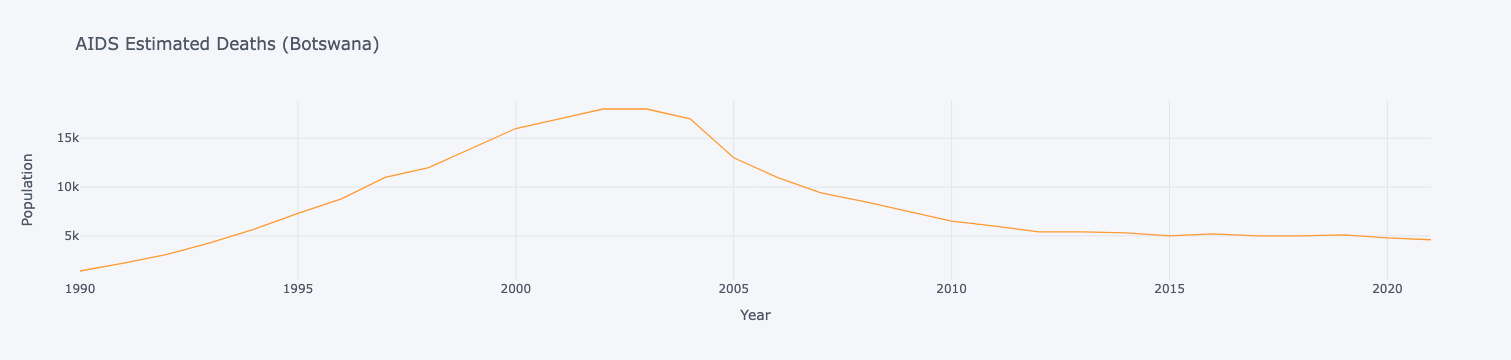

In [6]:
#Aids Estimated Deaths Plotted (Botswana)

aids_death = {"SH.DYN.AIDS.DH" : "BWA"}
aids = wbdata.get_dataframe(aids_death, country = "BWA")
aids.index = aids.index.astype(int)
aids = aids .dropna().sort_index()
aids.iplot(title="AIDS Estimated Deaths (Botswana)",xTitle='Year',yTitle='Population')

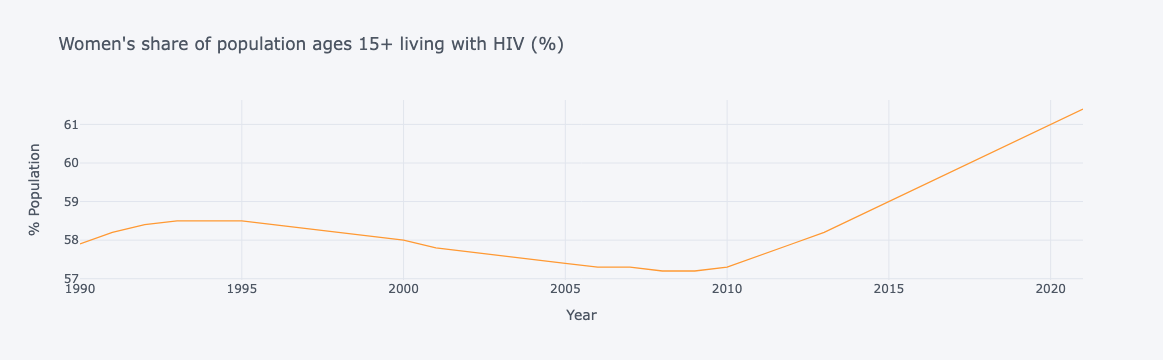

In [55]:
# Women's share of population ages 15+ living with HIV (%) (Botswana)

woman_hiv = {"SH.DYN.AIDS.FE.ZS" : "BWA"}
whiv = wbdata.get_dataframe(woman_hiv, country = "BWA").dropna()

whiv.index = whiv.index.astype(int)
whiv.iplot(title="Women's share of population ages 15+ living with HIV (%)",xTitle='Year',yTitle='% Population')


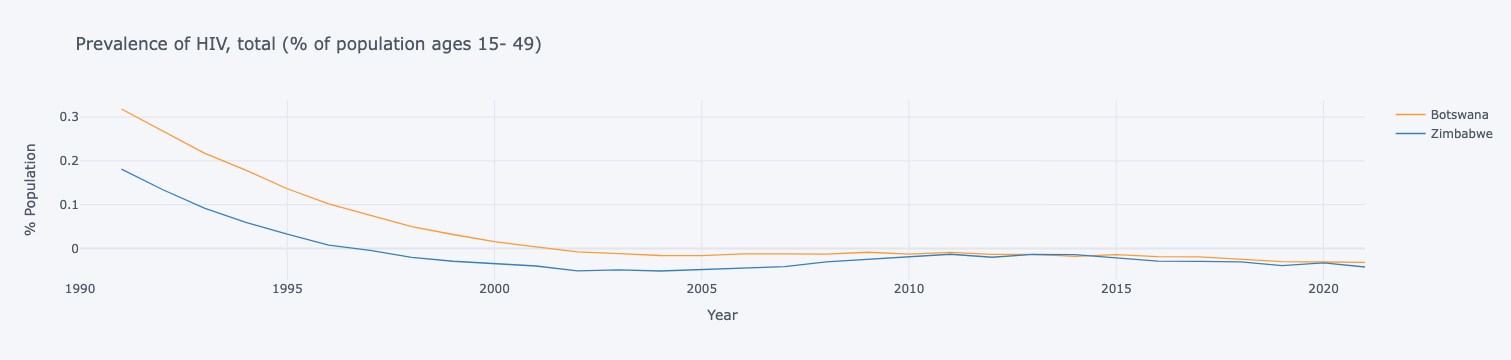

In [8]:
#prevelance of HIV total (% of population ages 15- 49) for both Botswana and Zimbabwe

labels = {"SH.DYN.AIDS.ZS" : "Prevelance of HIV, total (% of population ages 15 - 49)"}

countries =  {"BWA" : "Botswana",
            "ZWE" : "Zimbabwe",
           }

data = wbdata.get_dataframe(labels, country = countries).squeeze().dropna()

data = data.unstack('country')
data.index = data.index.astype(int)
data = data.sort_index()

np.log(data).diff().iplot(title = "Prevalence of HIV, total (% of population ages 15- 49)",
                          yTitle = "% Population",
                          xTitle = "Year")

In [98]:
#defining a bunch of functions 
import plotly.offline as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np

#defining pop_pyramid_df to transform the data into the correct dataframe 
def pop_pyramid_df(years, ctry):
    age_rangez = []

    #calculates age ranged based on years given parameter 
    for i in years:
        age_rangez.append(f"{i:02d}"+f"{i+4:02d}")
    
    age_rangez.append("80UP")

    #gets the male variable dictionary and combines with the female variable dictionary 
    male_variablez = {"SP.POP."+age_range+".MA":"Males "+age_range for age_range in age_rangez}
    female_variablez = {"SP.POP."+age_range+".FE":"Females "+age_range for age_range in age_rangez}
    
    #combines dictionarys 
    variablez = male_variablez
    variablez.update(female_variablez)
    
    #filters data and returns new data frame and list of age ranges 
    dfz = wbdata.get_dataframe(variablez,country=ctry)
    return dfz.query("date=='2020'").sum(axis=0), dfz, age_rangez

#calling function
result, dfz, age_rangez = pop_pyramid_df(range(0,80,5), "ZWE")


py.init_notebook_mode(connected=True)

#defining function to graph population pyramid 
def graph_pop_pyramid(dataframe, age_range, year, color1, color2,):
    layout = go.Layout(barmode='overlay',
                   yaxis=go.layout.YAxis(range=[0, 90], title='Age'),
                   xaxis=go.layout.XAxis(title='Population in Milions'))


    binz = [go.Bar(x = dfz.loc[str(year),:].filter(regex="Male").values,
               y = [int(s[:2])+1 for s in age_range],
               orientation='h',
               name='Men',
               marker=dict(color=color1),
               hoverinfo='skip'
               )

        go.Bar(x = -dfz.loc[str(year),:].filter(regex="Female").values,
               y=[int(s[:2])+1 for s in age_range],
               orientation='h',
               name='Women',
               marker=dict(color=color2),
               hoverinfo='skip',
               )
        ]
    return py.iplot(dict(data=binz, layout=layout))

#calling graph_pop_pyramid on values found for Zimbabwe
graph_pop_pyramid(dfz, age_rangez, 2020, 'teal', 'pink',)

#defining a new function to graph population pyramid for multiple years 
def graph_pop_pyramid_years(dataframe, age_range, years):
    
    layout = [go.Layout(barmode='overlay',
                   yaxis=go.layout.YAxis(range=[0, 90], title='Age'),
                   xaxis=go.layout.XAxis(title='Population in Millions')]
    
    binz = [go.Bar(x = dfz.loc[str(year),:].filter(regex="Male").values,
                   y = [int(s[:2])+1 for s in age_rangez],
                   orientation='h',
                   name='Men {:d}'.format(year),
                   hoverinfo='skip'
                  )
            for year in years]

    binz += [go.Bar(x = -dfz.loc[str(year),:].filter(regex="Female").values,
                    y=[int(s[:2])+1 for s in age_rangez],
                    orientation='h',
                    name='Women {:d}'.format(year),
                    hoverinfo='skip'
                   )
             for year in years]
    return py.iplot(dict(data=binz, layout=layout))

#calling graph_pop_pyramid_years on values found for Zimbabwe
graph_pop_pyramid_years(dfz, age_rangez, range(2020,1960, -10))
dfz

SyntaxError: invalid syntax (887388653.py, line 50)

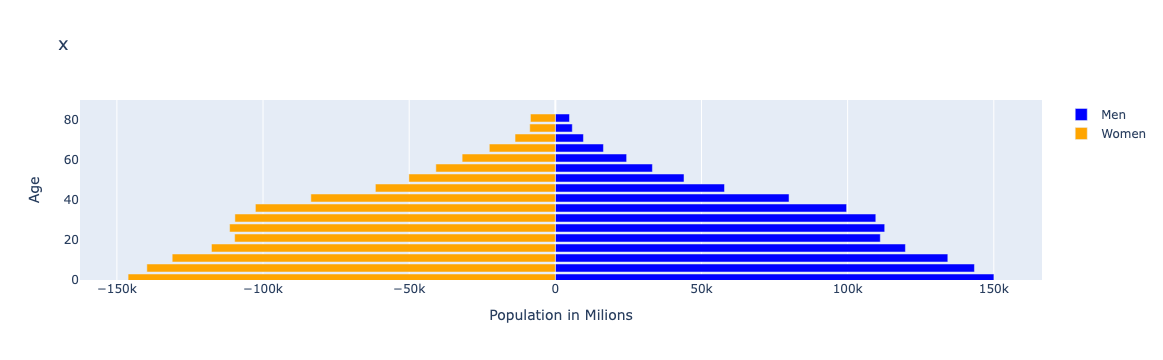

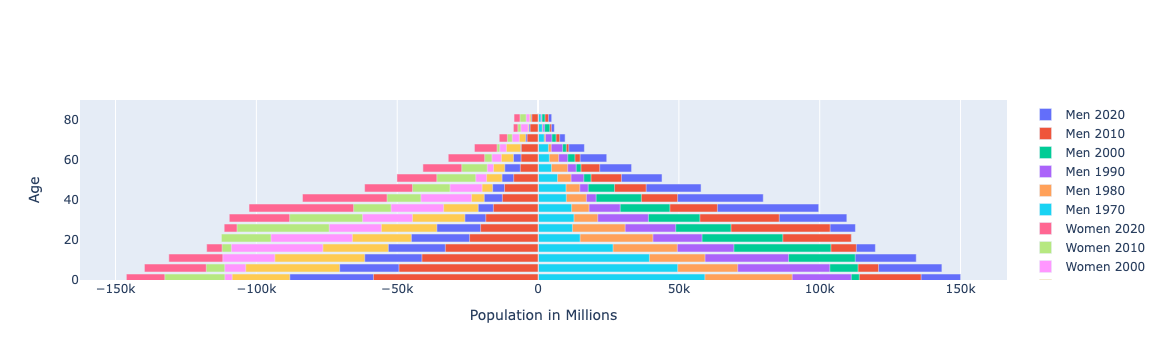

,Males 0004,Males 0509,Males 1014,Males 1519,Males 2024,Males 2529,Males 3034,Males 3539,Males 4044,Males 4549,...,Females 3539,Females 4044,Females 4549,Females 5054,Females 5559,Females 6064,Females 6569,Females 7074,Females 7579,Females 80UP
date,,,,,,,,,,,,,,,,,,,,,
2022,149974.0,145934.0,138362.0,124920.0,113728.0,112185.0,110193.0,103848.0,87450.0,64620.0,...,105783.0,91547.0,68600.0,52679.0,43475.0,34036.0,24666.0,15335.0,8948.0,8489.0
2021,150222.0,144715.0,136482.0,122116.0,112115.0,112666.0,109938.0,101882.0,83788.0,61069.0,...,104410.0,87732.0,64850.0,51346.0,42189.0,33004.0,23600.0,14483.0,8847.0,8492.0
2020,150033.0,143378.0,134270.0,119764.0,111166.0,112678.0,109632.0,99640.0,79951.0,57874.0,...,102611.0,83636.0,61566.0,50099.0,40877.0,31884.0,22585.0,13784.0,8753.0,8523.0
2019,149337.0,141969.0,131550.0,117722.0,111016.0,112118.0,108854.0,96970.0,75887.0,54945.0,...,100229.0,79291.0,58724.0,48695.0,39431.0,30524.0,21444.0,13056.0,8553.0,8319.0
2018,148338.0,140374.0,128517.0,115908.0,111343.0,111286.0,107593.0,93936.0,71806.0,52389.0,...,97362.0,74945.0,56394.0,47185.0,37988.0,29069.0,20164.0,12571.0,8374.0,8095.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,54393.0,44890.0,35007.0,23449.0,19639.0,18174.0,15573.0,12893.0,11956.0,8356.0,...,14577.0,13358.0,9467.0,7044.0,6814.0,6604.0,4951.0,4207.0,2682.0,1841.0
1963,53250.0,43413.0,33193.0,22734.0,19826.0,18193.0,15186.0,13104.0,11519.0,7988.0,...,14630.0,12825.0,8943.0,6997.0,7031.0,6401.0,5030.0,4217.0,2618.0,1786.0
1962,52199.0,41853.0,31134.0,22576.0,20069.0,18129.0,14776.0,13398.0,10931.0,7682.0,...,14788.0,12147.0,8487.0,7040.0,7260.0,6120.0,5181.0,4196.0,2544.0,1734.0


In [76]:
#calling pop_pyramid_df on Botswana 
result, dfz, age_rangez = pop_pyramid_df(range(0,80,5), "BWA")

py.init_notebook_mode(connected=True)

#calling graph_pop_pyramid on newly defined fpr Botswana dfz
graph_pop_pyramid(dfz, age_rangez, 2020, 'blue', 'orange')

#calling graph_pop_pyramid_years on newly defined for Botswana dfz
graph_pop_pyramid_years(dfz, age_rangez, range(2020,1960, -10))
dfz

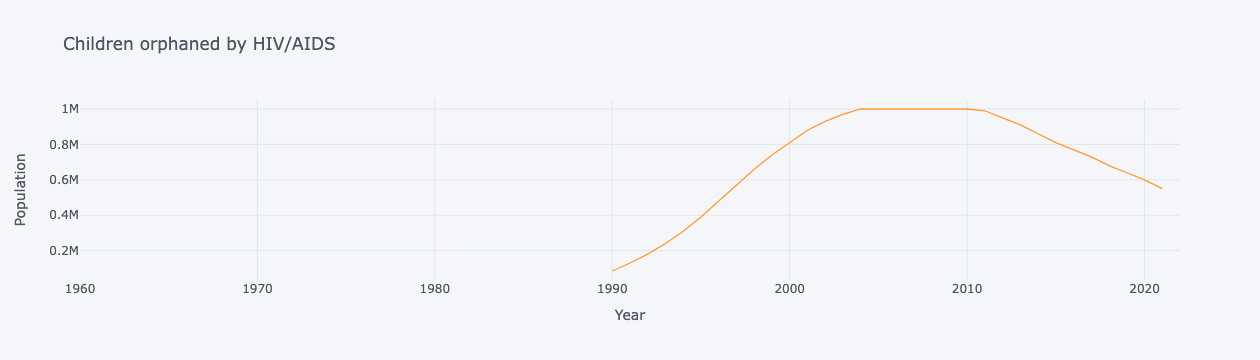

In [12]:
#children in Zimbabwe oprhaned by AIDS/ HIV
orphan_rate= {"SH.HIV.ORPH" : "ZWE"}
orphan = wbdata.get_dataframe(orphan_rate, country = "ZWE")

orphan.index = orphan.index.astype(int)
orphan.iplot(title="Children orphaned by HIV/AIDS",xTitle='Year',yTitle='Population')

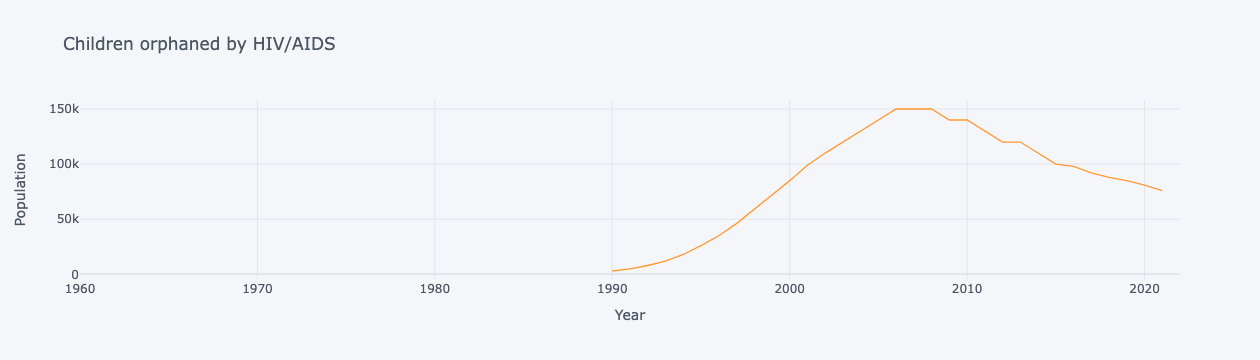

In [13]:
#children in Botswana orphaned by HIV/AIDS
orphan_rateB= {"SH.HIV.ORPH" : "BWA"}
orphanB = wbdata.get_dataframe(orphan_rate, country = "BWA")

orphanB.index = orphanB.index.astype(int)
orphanB.iplot(title="Children orphaned by HIV/AIDS",xTitle='Year',yTitle='Population')

In [16]:
from eep153_tools.sheets import read_sheets
from functools import cache
import pandas as pd 

@cache
def get_ag_data():
    """Read a bunch of google worksheets into a dictionary of dataframes"""
    data = read_sheets('https://docs.google.com/spreadsheets/d/1IL9BYacvhs6oIOAnp2KWYdTsoqIqReA2jGRlpheB9kQ/',sheet='Wide format data')

    Data = {'Country':'Country/territory','WDI Code':'ISO3','Year':'Year','Output':'Outall_Index','TFP':'TFP_Index','Land':'Land_Index','Labor':'Labor_Index','Capital':'Capital_Index','Materials':'Materials_Index'}

    df = data.rename(columns={v:k for k,v in Data.items()})
    df = df[Data.keys()].set_index(['WDI Code','Country','Year'])

    # Deal with some duplicate indices (drops regions)
    df = df.loc[~df.index.duplicated(),:]

    return df

In [17]:
import cufflinks as cf
cf.go_offline()

df = get_ag_data()

Key available for students@eep153.iam.gserviceaccount.com.


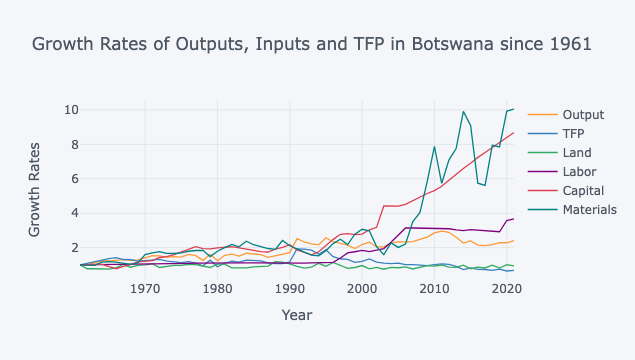

In [19]:
select = df.xs('BWA',level='WDI Code').dropna(how='any')

# Drop unnecessary index levels
select = select.droplevel(['Country'])

dselect = np.log(select).diff()
dselect['Inputs'] = dselect['Output'] - dselect['TFP']

select = df.xs('BWA',level='WDI Code').dropna(how='any').droplevel(['Country'])

select = select/select.loc[1961,:]
select.iplot(xTitle="Year", yTitle="Growth Rates", title="Growth Rates of Outputs, Inputs and TFP in Botswana since 1961")

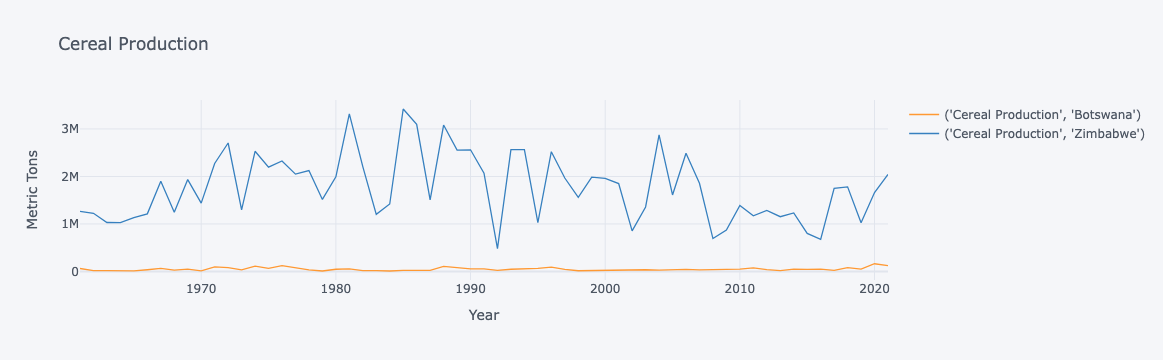

In [32]:
vars= {"AG.PRD.CREL.MT": "Cereal production"}

use = ["ZWE"]

vars= {"AG.PRD.CREL.MT": "Cereal production"}

use = ["BWA"]

cereals = fix_date_index(wbdata.get_dataframe(vars, country=use))


cereals = fix_date_index(wbdata.get_dataframe(vars, country=use))

labels = {"AG.PRD.CREL.MT": "Cereal Production"}
countries={"BWA" : "Botswana", "ZWE" : "Zimbabwe" , }
data=wbdata.get_dataframe(labels, country = countries).dropna()
data=data.unstack('country')
data.index=data.index.astype(int)
data=data.sort_index()
data.iplot(title= "Cereal Production", yTitle= "Metric Tons", xTitle= "Year")


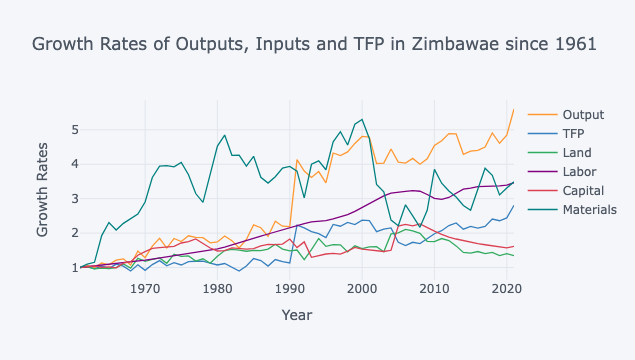

In [21]:
select = df.xs('ZWE',level='WDI Code').dropna(how='any').droplevel(['Country'])

select = select/select.loc[1961,:]
select.iplot(xTitle="Year", yTitle="Growth Rates", title="Growth Rates of Outputs, Inputs and TFP in Zimbawae since 1961")

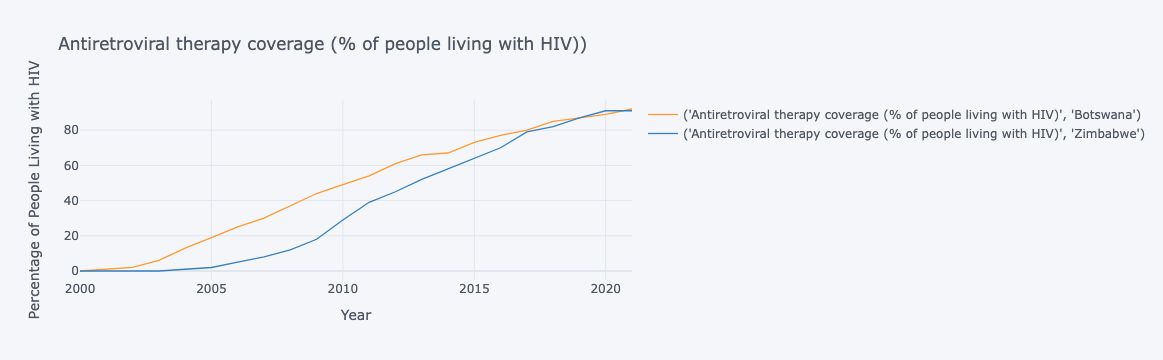

In [31]:

labels = {"SH.HIV.ARTC.ZS": "Antiretroviral therapy coverage (% of people living with HIV)"}
countries={"BWA" : "Botswana", "ZWE" : "Zimbabwe" , }
wdata=wbdata.get_dataframe(labels, country = countries).dropna()
wdata=wdata.unstack('country')
wdata.index=wdata.index.astype(int)
wdata=wdata.sort_index()
wdata.iplot(title= "Antiretroviral therapy coverage (% of people living with HIV))", yTitle= "Percentage of People Living with HIV", xTitle= "Year")

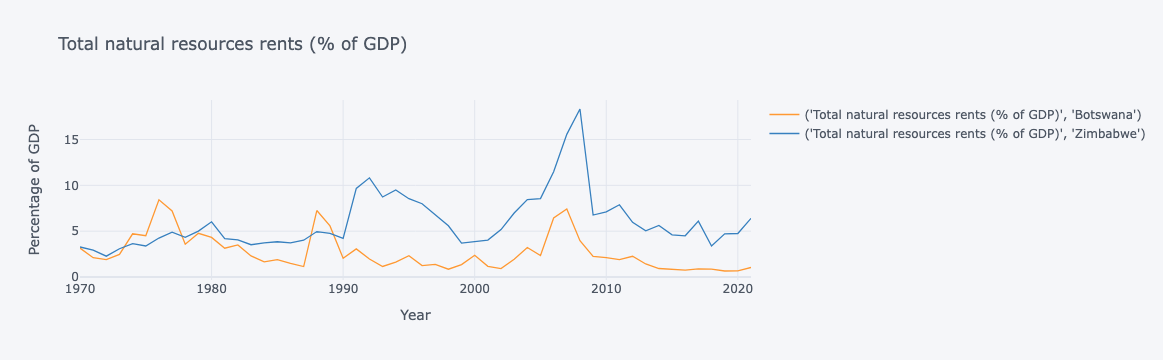

In [30]:
labels = {"NY.GDP.TOTL.RT.ZS": "Total natural resources rents (% of GDP)"}
countries={"BWA" : "Botswana", "ZWE" : "Zimbabwe" , }
data=wbdata.get_dataframe(labels, country = countries).dropna()
data=data.unstack('country')
data.index=data.index.astype(int)
data=data.sort_index()
data.iplot(title= "Total natural resources rents (% of GDP)", yTitle= "Percentage of GDP", xTitle= "Year")


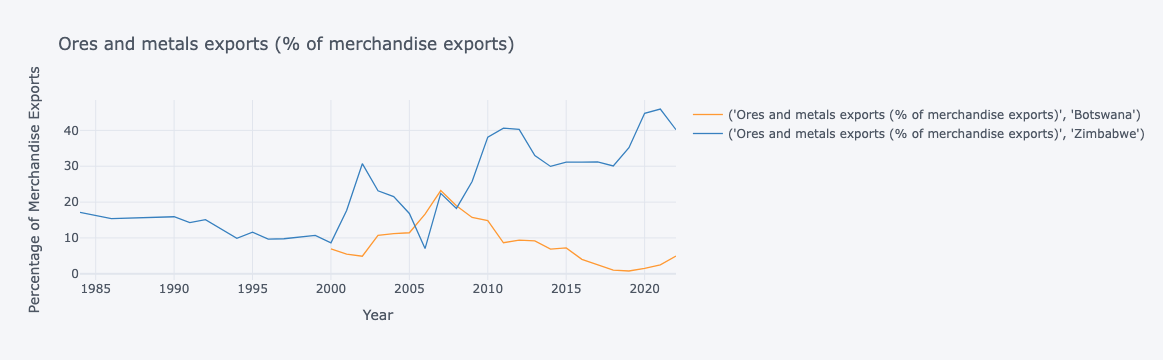

In [29]:
labels = {"TX.VAL.MMTL.ZS.UN": "Ores and metals exports (% of merchandise exports)"}
countries={"BWA" : "Botswana", "ZWE" : "Zimbabwe" , }
data=wbdata.get_dataframe(labels, country = countries).dropna()
data=data.unstack('country')
data.index=data.index.astype(int)
data=data.sort_index()
data.iplot(title= "Ores and metals exports (% of merchandise exports)", yTitle= "Percentage of Merchandise Exports", xTitle= "Year")


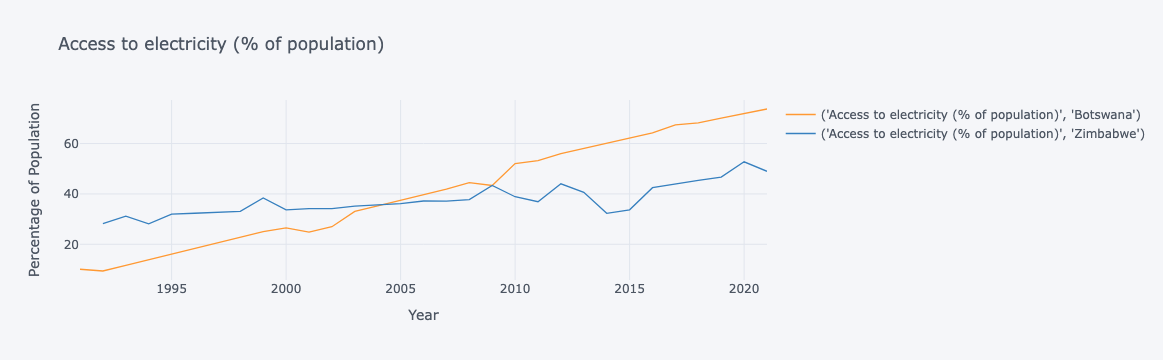

In [28]:


vars= {"EG.ELC.ACCS.ZS": "Access to electricity (% of population))"}

use = ["ZWE"]

vars= {"EG.ELC.ACCS.ZS": "Access to electricity (% of population))"}

use = ["BWA"]

belectricity = fix_date_index(wbdata.get_dataframe(vars, country=use)).dropna()

belectricity = fix_date_index(wbdata.get_dataframe(vars, country=use)).dropna()
labels = {"EG.ELC.ACCS.ZS": "Access to electricity (% of population)"}
countries={"BWA" : "Botswana", "ZWE" : "Zimbabwe" , }
data=wbdata.get_dataframe(labels, country = countries).dropna()
data=data.unstack('country')
data.index=data.index.astype(int)
data=data.sort_index()
data.iplot(title= "Access to electricity (% of population)", yTitle= "Percentage of Population", xTitle= "Year")

In [78]:
import matplotlib.pyplot as plt
indicator2 = "SH.DYN.AIDS.ZS"
country_code = "BWA"

data_bot = wbdata.get_dataframe(indicators={indicator2: 'value'}, country=country_code).dropna()
data_bot.index = data_bot.index.astype(int)
data_bot = data_bot.sort_index().dropna()
data_bot.head()

,value
date,
1990,6.4
1991,8.8
1992,11.5
1993,14.3
1994,17.1


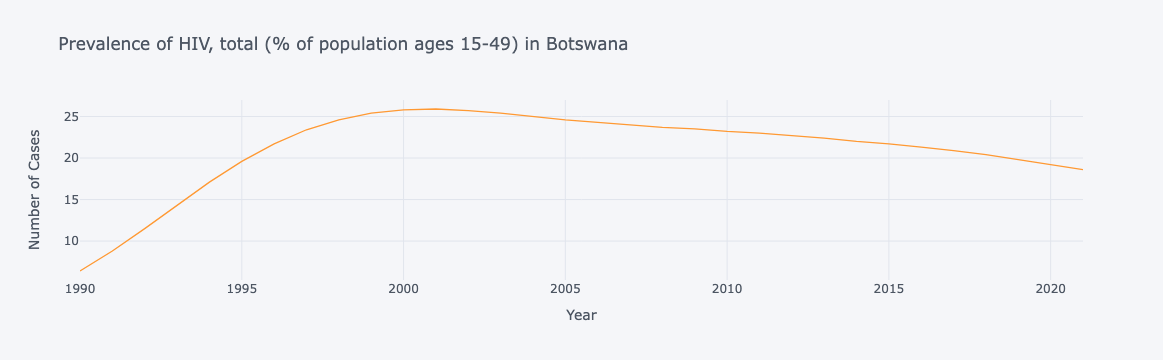

In [79]:
data_bot.iplot(title="Prevalence of HIV, total (% of population ages 15-49) in Botswana",xTitle='Year',yTitle='Number of Cases')


In [81]:
indicator3 = "SP.DYN.TFRT.IN"
country_code = "BWA"

data_fert = wbdata.get_dataframe(indicators={indicator3: 'Total Births Per Woman'}, country=country_code)
data_fert.index = data_fert.index.astype(int)
data_fert = data_fert.sort_index().dropna()
data_fert.head()

,Total Births Per Woman
date,
1960,6.628
1961,6.597
1962,6.571
1963,6.632
1964,6.688


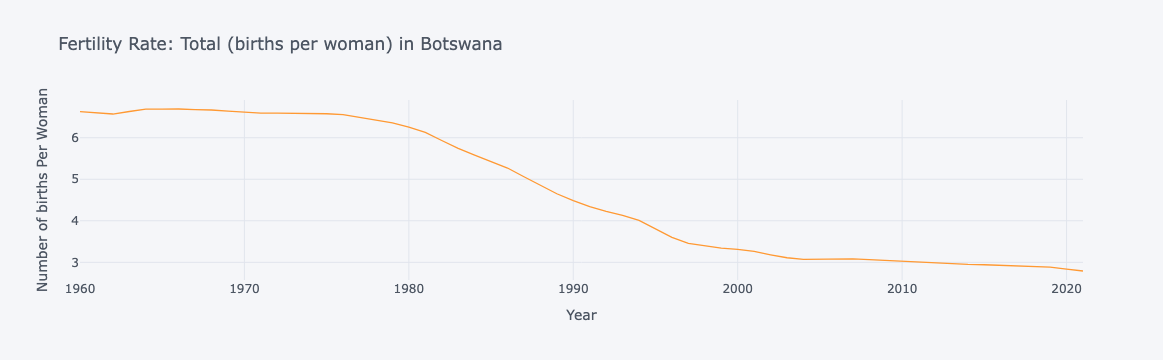

In [124]:
data_fert.iplot(title="Fertility Rate: Total (births per woman) in Botswana",xTitle='Year',yTitle='Number of births Per Woman')

<Axes: xlabel='date'>

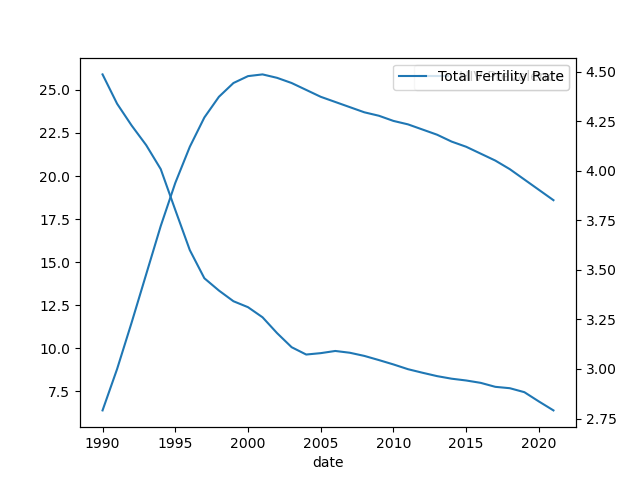

In [83]:
indicators = {"SH.DYN.AIDS.ZS":'HIV Prevalence',
              "SP.DYN.TFRT.IN":'Total Fertility Rate'}
country_code = "BWA"

data_bot = wbdata.get_dataframe(indicators=indicators, country=country_code).dropna()

data_bot = data_bot.sort_index()

fig,ax = plt.subplots()

data_bot.reset_index().plot(x='date',y='HIV Prevalence',ax=ax)

ax2 = ax.twinx()

data_bot.reset_index().plot(x='date',y='Total Fertility Rate',ax=ax2)

<Axes: xlabel='date'>

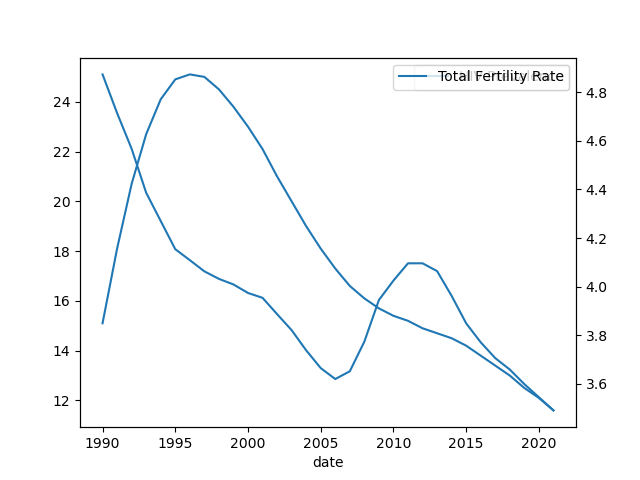

In [84]:
import wbdata
import matplotlib.pyplot as plt
%matplotlib widget

indicators = {"SH.DYN.AIDS.ZS":'HIV Prevalence',
              "SP.DYN.TFRT.IN":'Total Fertility Rate'}
country_code = "ZWE"

data_zim = wbdata.get_dataframe(indicators=indicators, country=country_code).dropna()

data_zim = data_zim.sort_index()

fig,ax = plt.subplots()

data_zim.reset_index().plot(x='date',y='HIV Prevalence',ax=ax)

ax2 = ax.twinx()

data_zim.reset_index().plot(x='date',y='Total Fertility Rate',ax=ax2)

In [85]:
indicator3 = "SP.DYN.TFRT.IN"
country_codezim = "ZWE"

data_fertzim = wbdata.get_dataframe(indicators={indicator3: 'Total Births Per Woman'}, country=country_code)

data_fertzim.index = data_fertzim.index.astype(int)
data_fertzim = data_fertzim.sort_index().dropna()
data_fertzim.head()

,Total Births Per Woman
date,
1960,7.220
1961,7.233
1962,7.255
1963,7.253
1964,7.261


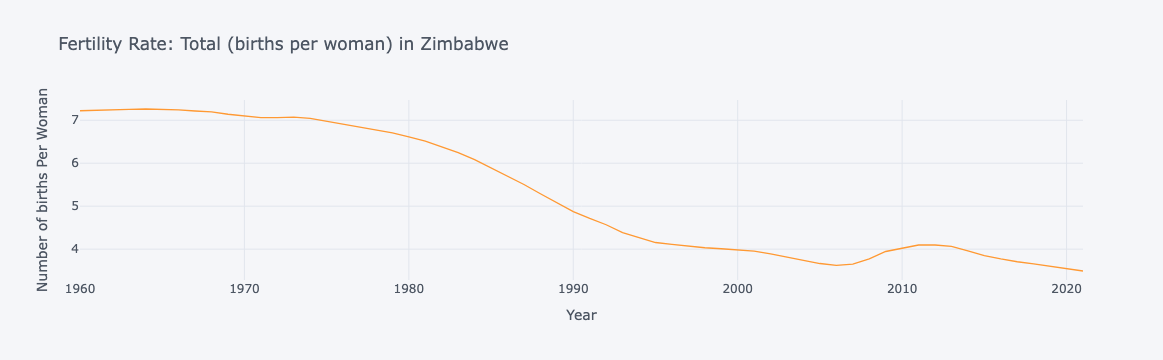

In [125]:
data_fertzim.iplot(title="Fertility Rate: Total (births per woman) in Zimbabwe",xTitle='Year',yTitle='Number of births Per Woman')

In [87]:
import matplotlib.pyplot as plt
indicator6 = "SH.DYN.AIDS.ZS"
country_code = "ZWE"

data_zim_prevelance = wbdata.get_dataframe(indicators={indicator6: 'value'}, country=country_code)

data_zim_prevelance.index = data_zim_prevelance.index.astype(int)
data_zim_prevelance = data_zim_prevelance.sort_index().dropna()
data_zim_prevelance.head()

,value
date,
1990,15.1
1991,18.1
1992,20.7
1993,22.7
1994,24.1


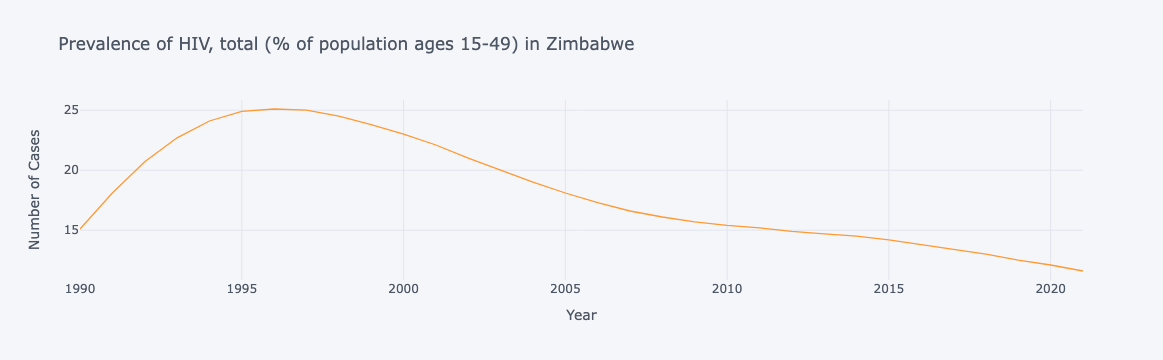

In [88]:
data_zim_prevelance.iplot(title="Prevalence of HIV, total (% of population ages 15-49) in Zimbabwe",xTitle='Year',yTitle='Number of Cases')

In [89]:
indicatorwomen = "SH.HIV.1524.FE.ZS"
country_codewomen = "BWA"

data_women = wbdata.get_dataframe(indicators={indicatorwomen: 'Prevalence of HIV, female (% ages 15-24)'}, country=country_codewomen).dropna()

data_women.index = data_women.index.astype(int)
data_women = data_women.sort_index().dropna()

data_women.head()

,"Prevalence of HIV, female (% ages 15-24)"
date,
1990,5.5
1991,7.4
1992,9.5
1993,11.6
1994,13.5


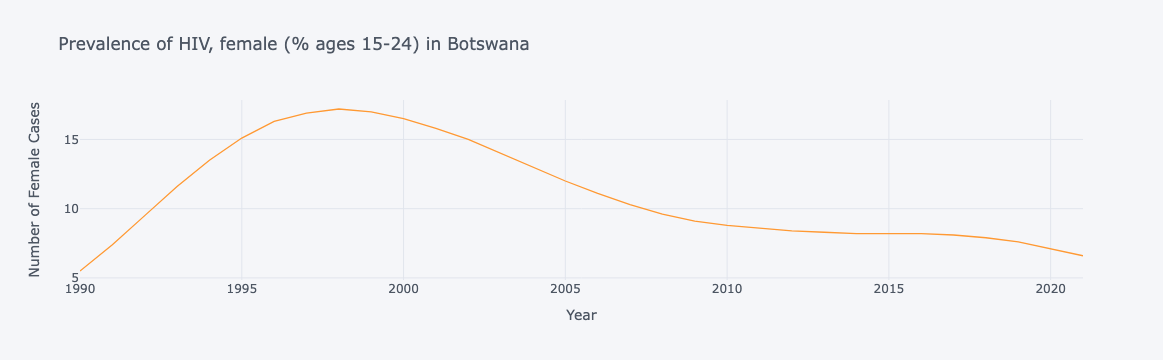

In [122]:
data_women.iplot(title="Prevalence of HIV, female (% ages 15-24) in Botswana",xTitle='Year',yTitle='Number of Female Cases')

In [91]:
indicatormen = "SH.HIV.1524.MA.ZS"
country_codemen = "BWA"

data_men = wbdata.get_dataframe(indicators={indicatormen: 'Prevalence of HIV, male (% ages 15-24)'}, country=country_codemen).dropna()

data_men.index = data_men.index.astype(int)
data_men = data_men.sort_index().dropna()

data_men.head()

,"Prevalence of HIV, male (% ages 15-24)"
date,
1990,3.0
1991,3.9
1992,4.9
1993,5.9
1994,6.8


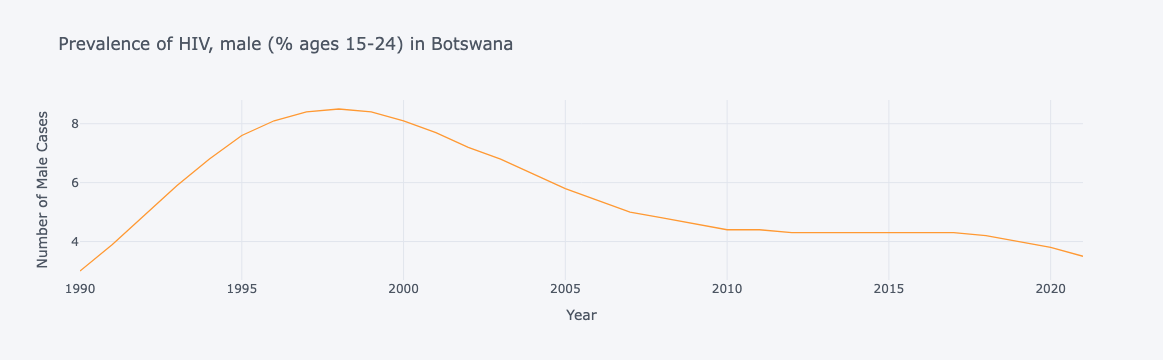

In [123]:
data_men.iplot(title="Prevalence of HIV, male (% ages 15-24) in Botswana",xTitle='Year',yTitle='Number of Male Cases')

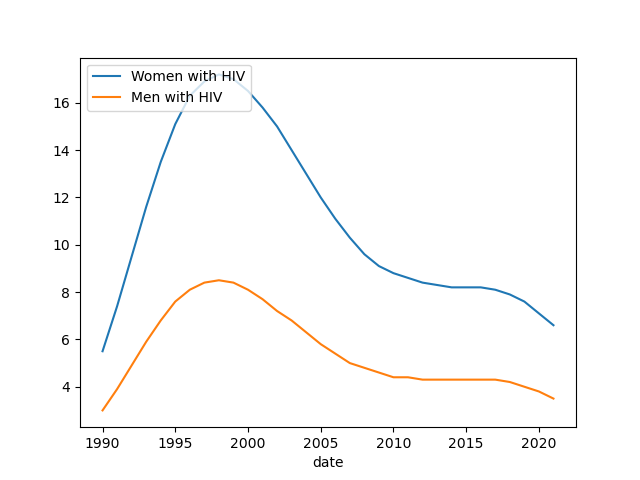

In [93]:
indicatorsgender = {"SH.HIV.1524.FE.ZS":'Women with HIV',
              "SH.HIV.1524.MA.ZS":'Men with HIV'}
country_code_gender = "BWA"

data_gender = wbdata.get_dataframe(indicators=indicatorsgender, country=country_code_gender).dropna()

data_gender = data_gender.sort_index()
data_gender

data_gender.columns = ['Women with HIV', 'Men with HIV']

data_gender = data_gender.sort_index()

# Plot both lines on the same graph
fig, ax = plt.subplots()

data_gender.reset_index().plot(x='date', y='Women with HIV', ax=ax, label='Women with HIV')
data_gender.reset_index().plot(x='date', y='Men with HIV', ax=ax, label='Men with HIV')

ax.legend(loc='upper left')
plt.show()

In [119]:
indicatorwomenzim = "SH.HIV.1524.FE.ZS"
country_codewomenzim = "ZWE"

data_womenzim = wbdata.get_dataframe(indicators={indicatorwomenzim: 'Prevalence of HIV, female (% ages 15-24)'}, country=country_codewomenzim).dropna()

data_womenzim.index = data_womenzim.index.astype(int)
data_womenzim = data_womenzim.sort_index().dropna()

data_womenzim.head()

,"Prevalence of HIV, female (% ages 15-24)"
date,
1990,16.0
1991,18.6
1992,20.6
1993,21.7
1994,22.1


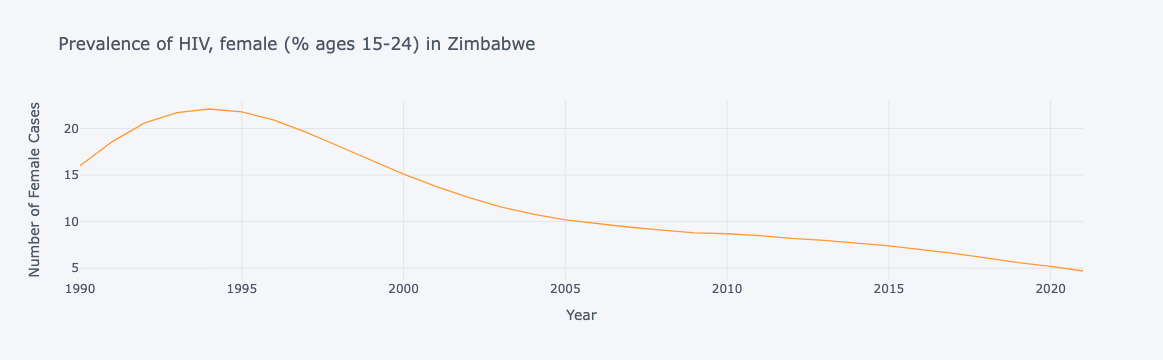

In [118]:
data_womenzim.iplot(title="Prevalence of HIV, female (% ages 15-24) in Zimbabwe",xTitle='Year',yTitle='Number of Female Cases')

In [117]:
indicatormenzim = "SH.HIV.1524.MA.ZS"
country_codemenzim = "ZWE"

data_menzim = wbdata.get_dataframe(indicators={indicatormenzim: 'Prevalence of HIV, female (% ages 15-24)'}, country=country_codemenzim).dropna()

data_menzim.index = data_menzim.index.astype(int)
data_menzim = data_menzim.sort_index().dropna()

data_menzim.head()

,"Prevalence of HIV, female (% ages 15-24)"
date,
1990,7.0
1991,7.8
1992,8.3
1993,8.4
1994,8.3


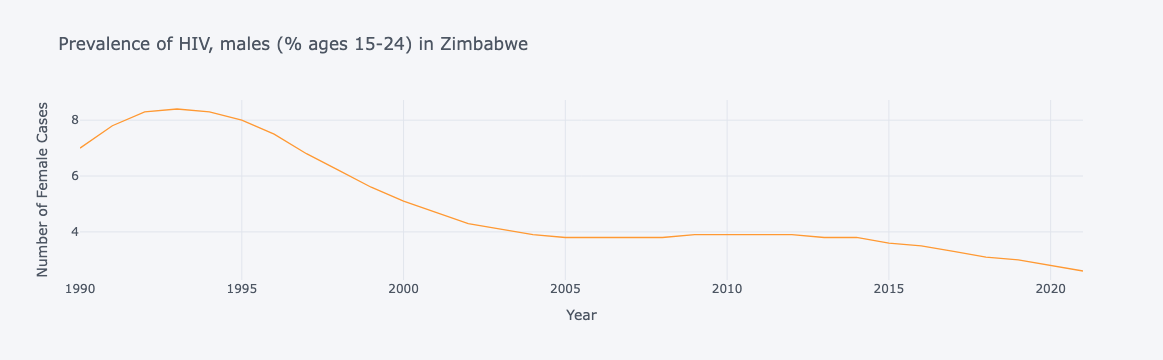

In [121]:
data_menzim.iplot(title="Prevalence of HIV, males (% ages 15-24) in Zimbabwe",xTitle='Year',yTitle='Number of Female Cases')

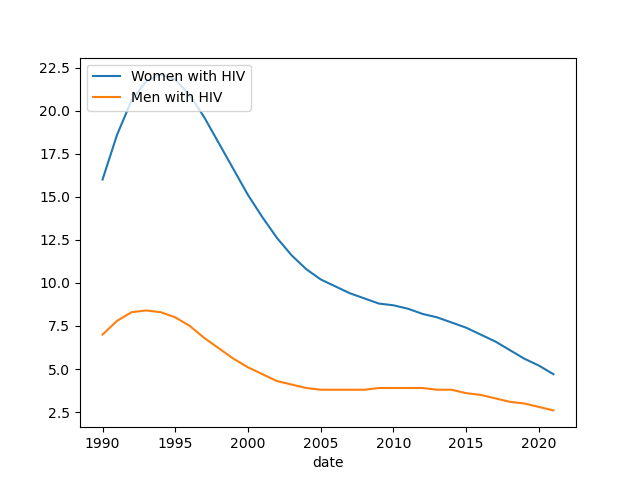

In [120]:
indicatorsgender = {"SH.HIV.1524.FE.ZS":'Women with HIV',
              "SH.HIV.1524.MA.ZS":'Men with HIV'}
country_code_gender_zim = "ZWE"

data_gender_zim = wbdata.get_dataframe(indicators=indicatorsgender, country=country_code_gender_zim).dropna()

data_gender_zim = data_gender_zim.sort_index()
data_gender_zim.columns = ['Women with HIV', 'Men with HIV']

data_gender_zim = data_gender_zim.sort_index()

# Plot both lines on the same graph
fig, ax = plt.subplots()

data_gender_zim.reset_index().plot(x='date', y='Women with HIV', ax=ax, label='Women with HIV')
data_gender_zim.reset_index().plot(x='date', y='Men with HIV', ax=ax, label='Men with HIV')

ax.legend(loc='upper left')
plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 3.9 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 32.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 41.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 7.0 MB/s eta 0:00:0000:01
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
linearmodels 0.0.0 requires setuptools-scm[toml]<9.0.0,>=8.0.0, which is not installed.
Note: you may need to restart the kernel to use updated packages.


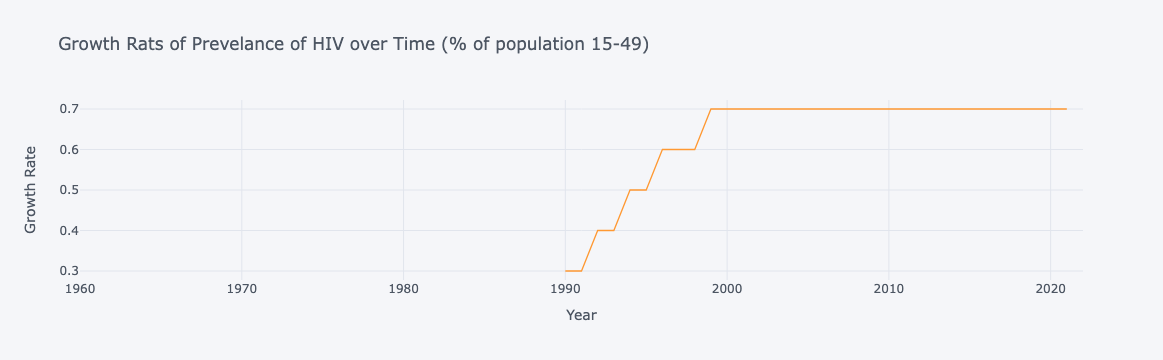

In [106]:
import numpy as np

variable_labels = {"SH.DYN.AIDS.ZS":"Prevelance of HIV, total (% of population ages 15 - 49)"}

# Three letter codes come from wbdata.get_country()
countries = {"WLD":"World"}

df = wbdata.get_dataframe(variable_labels, country = countries).squeeze()


# Date index is of type string; change to integers
df.index = df.index.astype(int)

# Differences (over time) in logs give us growth rates
df.iplot(title="Growth Rats of Prevelance of HIV over Time (% of population 15-49)",
                        yTitle="Growth Rate",xTitle='Year')


KeyError: 'Level 2020 not found'